In [1]:
pip install numpy pandas matplotlib seaborn scikit-learn tensorflow


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 512ms/step - accuracy: 0.3215 - loss: 1.1211 - val_accuracy: 0.3000 - val_loss: 1.1572
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2944 - loss: 1.1222 - val_accuracy: 0.3000 - val_loss: 1.1320
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3310 - loss: 1.1168 - val_accuracy: 0.3000 - val_loss: 1.1087
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2956 - loss: 1.0961 - val_accuracy: 0.3000 - val_loss: 1.0864
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3290 - loss: 1.0615 - val_accuracy: 0.3000 - val_loss: 1.0647
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3175 - loss: 1.0421 - val_accuracy: 0.3000 - val_loss: 1.0437
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2831 - loss: 1.0736 - val_accuracy: 0.3000 - val_loss: 1.0233
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3152 - loss: 1.0327 - val_accuracy: 0.3000 - val_loss: 1.0038
Epoch 9/50


Model Performance Summary
----------------------------
Training Accuracy: 0.8333
Testing Accuracy: 0.9333
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


/tmp/ipython-input-6-283066297.py:78: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


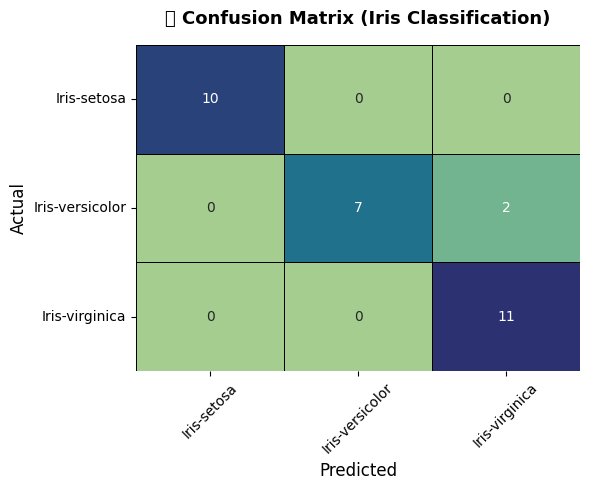


Classification Report
---------------------


/tmp/ipython-input-6-283066297.py:109: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.78      0.88         9
 Iris-virginica       0.85      1.00      0.92        11

       accuracy                           0.93        30
      macro avg       0.95      0.93      0.93        30
   weighted avg       0.94      0.93      0.93        30



/tmp/ipython-input-6-283066297.py:109: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


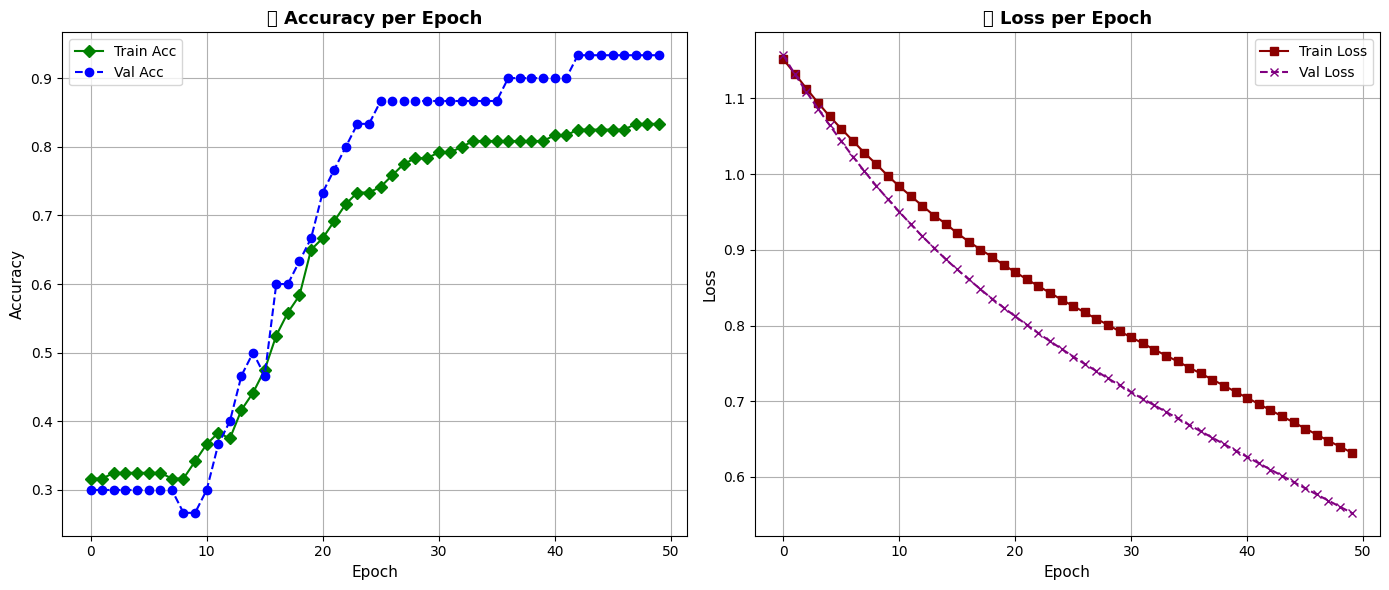

In [6]:
import zipfile
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# dataset
archive_path = '/content/iris.zip'  # Update this path based on your upload
with zipfile.ZipFile(archive_path, 'r') as zip_ref:
    zip_ref.extractall('/content/iris_data')
csv_path = '/content/iris_data/Iris.csv'  # Adjust if filename is different
df = pd.read_csv(csv_path)

# drop ID column if present
if 'Id' in df.columns:
    df.drop(columns='Id', inplace=True)

# features and labels
X = df.drop('Species', axis=1).values
y = df['Species'].values

# label encoding and one-hot encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_onehot = tf.keras.utils.to_categorical(y_encoded, num_classes=3)

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# normalize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# MLP model
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(4,)))  # hidden layer with 10 neurons
model.add(Dense(3, activation='softmax'))  # output layer with 3 neurons

# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# training
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)

# evaluation
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

# print accuracy
print("\nModel Performance Summary")
print("----------------------------")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# confusion matrix - custom style
plt.figure(figsize=(6, 5))
conf_matrix = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(conf_matrix, annot=True, cmap='crest', fmt='d', linewidths=0.5, linecolor='black',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, cbar=False)
plt.title("📊 Confusion Matrix (Iris Classification)", fontsize=13, fontweight='bold', pad=15)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# classification report
print("\nClassification Report")
print("---------------------")
print(classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_))

# accuracy and loss plots - custom style
plt.figure(figsize=(14, 6))

# accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc', color='green', marker='D')
plt.plot(history.history['val_accuracy'], label='Val Acc', color='blue', linestyle='--', marker='o')
plt.title('📈 Accuracy per Epoch', fontsize=13, fontweight='bold')
plt.xlabel('Epoch', fontsize=11)
plt.ylabel('Accuracy', fontsize=11)
plt.legend()
plt.grid(True)

# loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='darkred', marker='s')
plt.plot(history.history['val_loss'], label='Val Loss', color='purple', linestyle='--', marker='x')
plt.title('📉 Loss per Epoch', fontsize=13, fontweight='bold')
plt.xlabel('Epoch', fontsize=11)
plt.ylabel('Loss', fontsize=11)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()